<a href="https://colab.research.google.com/github/m3nkam/ml-covid19/blob/main/pfe_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importation des librairies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importation du Dataset
url = 'https://raw.githubusercontent.com/m3nkam/ml-covid19/main/datasetcovid19.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
#Effectuons une copie de nos données 
df = data.copy()
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentrationï¿½(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferaseï¿½,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calciumï¿½,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin timeï¿½(PTT)ï¿½,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinaseï¿½(CPK)ï¿½,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,-6.594685e-09,-3.378738e-09,7.146180e-09,-4.149502e-09,-3.269551e-09,1.020598e-08,7.067308e-09,NaN,5.890838e-09,-6.707809e-09,2.760870e-09,-6.669811e-09,2.053100e-08,1.105946e-08,2.742222e-09,-5.265486e-10,-1.535948e-09,-2.626374e-09,1.206044e-08,3.170330e-09,-2.048611e-09,1.914000e-08,-5.225000e-09,-1.935294e-08,1.508088e-08,-1.058824e-09,-7.933824e-09,0.0,-9.139706e-09,3.617647e-09,-4.463235e-09,2.793815e-09,-2.670103e-08,7.257732e-09,8.453608e-09,1.410309e-08,0.0,-2.585714e-09,NaN,7.585714e-09,NaN,-9.230769e-10,-4.774436e-09,1.752475e-09,NaN,-2.000000e-08,-6.471154e-09,7.260870e-09,-1.370370e-09,-3.875000e-09,NaN,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1

In [3]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#Effectuons l'analyse des données du Dataset à l'aide de la librairie pandas_profiling
#profile = ProfileReport(dataset, title="Pandas Profiling Report", explorative=True)
#profile.to_notebook_iframe()

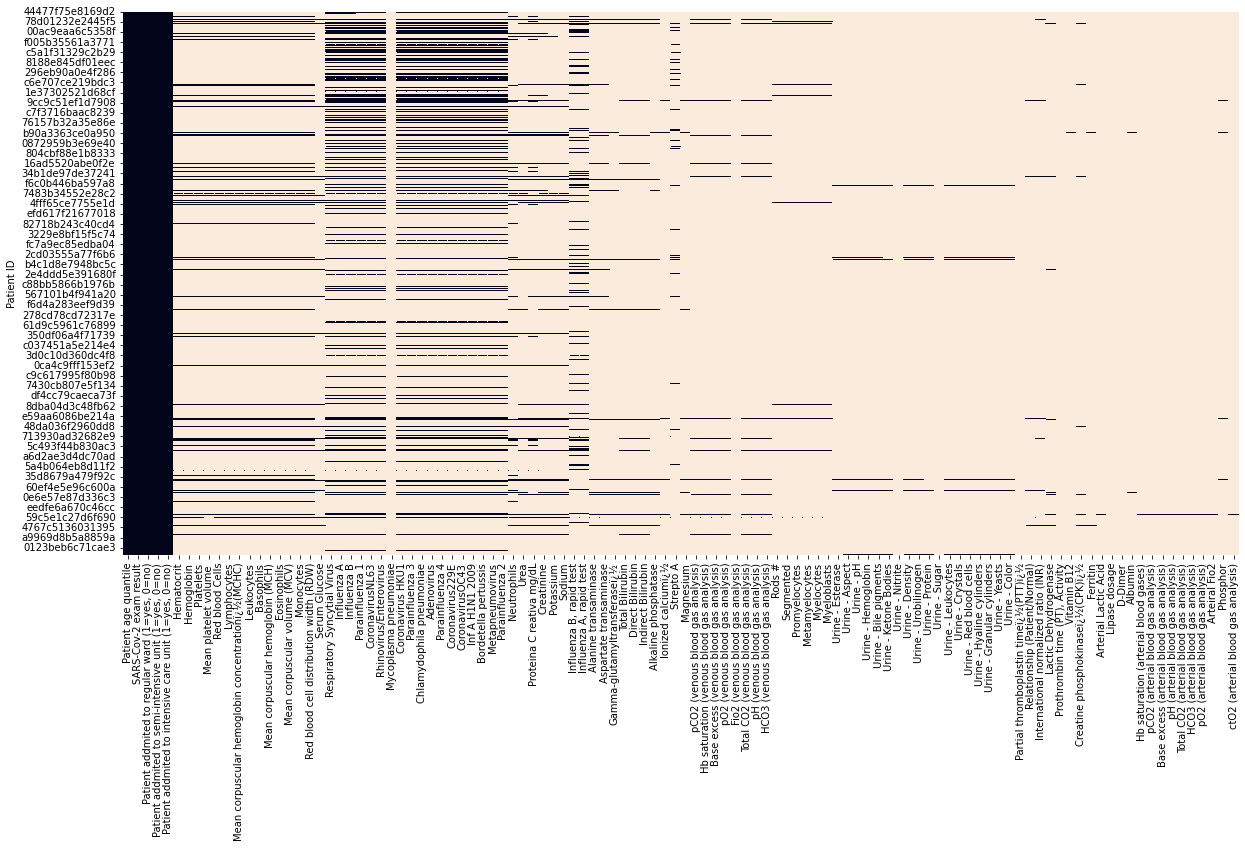

In [4]:
#Visualisons toutes nos données dans une image
plt.figure(figsize = (20,10))

In [5]:
#Créons des sous-ensembles positif et négatif
positive_df=df[df['SARS-Cov-2 exam result']=='positive']
#Créons des sous-ensembles positif et négatif
negative_df=df[df['SARS-Cov-2 exam result']=='negative']
